# Portafolios de Inversión
## Tarea 3

- José Armando Melchor Soto
---

### Indicaciones 

Asume que eres el Portfolio Manager de Banamex y deseas comparar el desempeño de una estrategia de inversión activa con una pasiva (Benchmark), realizando un análisis básico del riesgo y rendimiento de ambas estrategias. Sigue los pasos para evaluarlas:

1.- Tu estrategia de inversión activa contiene las sigtes. acciones con ponderaciones equitativas Berkshire Hathaway B, Visa, Goldman Sachs Group Inc, Progressive Corp, para tu portafolio:

Investiga los tickers de cada acción, su sector y modelo de negocio, dando un resumen ejecutivo de estas. (10%)
Descarga los precios de cierre ajustado desde el 2018-01-01 hasta 2025-06-03.
Calcula las métricas de riesgo y rendimiento anuales, coeficiente de variación, ratio de Sharpe y la matriz de correlación. (20%)
Interpreta la matriz de correlación. (10%)
 

2.- Ahora, compara tu estrategia de inversión activa contra una pasiva:

En base a tu investigación pre-eliminar busca un índice que represente el sector de tus activos, comenta el nombre, ticker y los constituyentes de este. Descarga los precios del índice Yahoo Finance. (10%)
Para el índice, calcula las métricas de riesgo y rendimiento anuales, además del ratio de Sharpe. (20%)
 

3. -A manera de conclusión, en función de las métricas calculadas y en base a los dos Radios de Sharpe calculados para cada estrategia, responde:

¿En que estrategia invertirías y por qué?, ¿Habría una forma de mejorar la estrategia activa? es decir, ¿Qué podrías cambiar en tu portafolio para obtener mejores resultados? (30%)
Nota: Asume una tasa libre de riesgo del 3% anual.
Entrega tu tarea en un html descargado de Jupyter Notebook.

---

# 1. Estrategia de Inversión Activa

---

### Investigación sobre los Activos

- Berkshire Hathaway B (**BRK-B**):
    Es un holding estadounidense dueño total o parcial de las acciones de varios grupos empresariales. Tiene sus raíces en la fábrica textil establecida en 1839 por Oliver Chace conocida como Valley Falls Company, en Valley Falls, Rhode Island
    - Sector económico: Financiero

- Visa (**V**):
    - Es una multinacional de servicios financieros cuya sede hasta 2019 fue en Foster City, California, Estados Unidos, y actualmente en el edificio One Market Plaza de San Francisco. Facilita las transferencias electrónicas de fondos en todo el mundo, más comúnmente a través de tarjetas de crédito, débito, prepago, regalo y monedero con la marca Visa.
    - Sector económico: Financiero


- Goldman Sachs Group Inc (**GS**):
    - Esta compañía da servicios a otras compañías , instituciones financieras , gobierno , y una gran parte de individuos. Con esto se puede decir que es es uno de los grupos de banca de inversión y de valores más grande del mundo.
    - Sector económico: Financiero 

- Progressive Corp (**PGR**): 
    - Esta es una compañía de seguros estadounidense, donde es la compañía número dos de todo Estados Unidos, esta proporciona seguros personales y comerciales de automóviles y propiedades, otros seguros especiales de propiedad y accidentes y servicios relacionados.
    - Sector económico: Finaciero / seguros


---

### Librerías

In [639]:
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

---

### Importación de datos


In [640]:
prices = yf.download(['BRK-B','V' ,'GS','PGR'],start='2018-01-01', end= '2025-06-03')['Close']
prices

[*********************100%***********************]  4 of 4 completed


Ticker,BRK-B,GS,PGR,V
Date,,,,
2018-01-02,197.220001,216.480896,45.511356,108.740440
2018-01-03,199.789993,214.465668,45.486694,109.823006
2018-01-04,200.690002,217.463058,45.478477,110.231331
2018-01-05,201.419998,216.353867,45.651115,112.871269
2018-01-08,202.740005,213.212540,45.790871,113.327057
...,...,...,...,...
2025-05-27,509.160004,612.676086,278.750000,359.299988
2025-05-28,503.109985,605.422241,277.029999,359.730011
2025-05-29,506.179993,601.859985,277.299988,362.399994


---

### Retorno y pesos

In [641]:
w= np.array([0.25, 0.25, 0.25, 0.25])
np.sum(w)

1.0

In [642]:
ret = prices.pct_change().dropna()
ret

Ticker,BRK-B,GS,PGR,V
Date,,,,
2018-01-03,0.013031,-0.009309,-0.000542,0.009955
2018-01-04,0.004505,0.013976,-0.000181,0.003718
2018-01-05,0.003637,-0.005101,0.003796,0.023949
2018-01-08,0.006554,-0.014519,0.003061,0.004038
2018-01-09,0.001381,0.008459,0.008438,-0.001927
...,...,...,...,...
2025-05-27,0.011322,0.028720,0.005229,0.016292
2025-05-28,-0.011882,-0.011840,-0.006170,0.001197
2025-05-29,0.006102,-0.005884,0.000975,0.007422


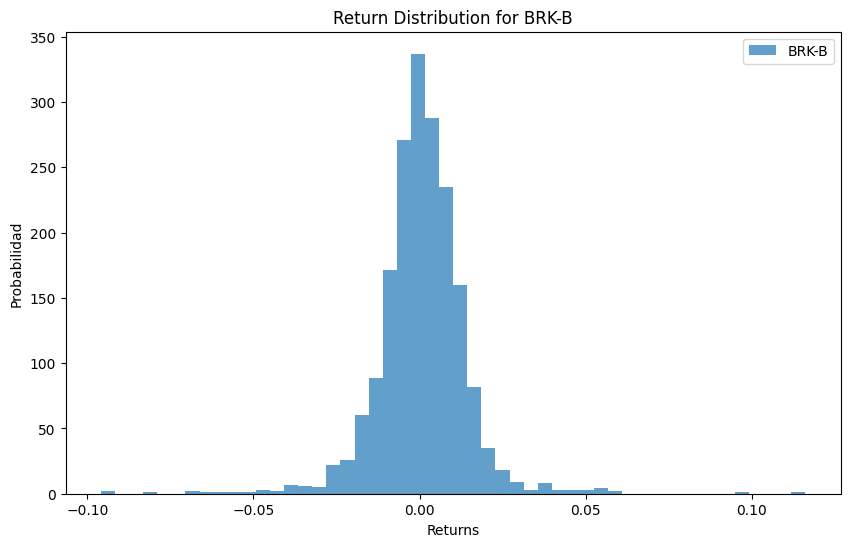

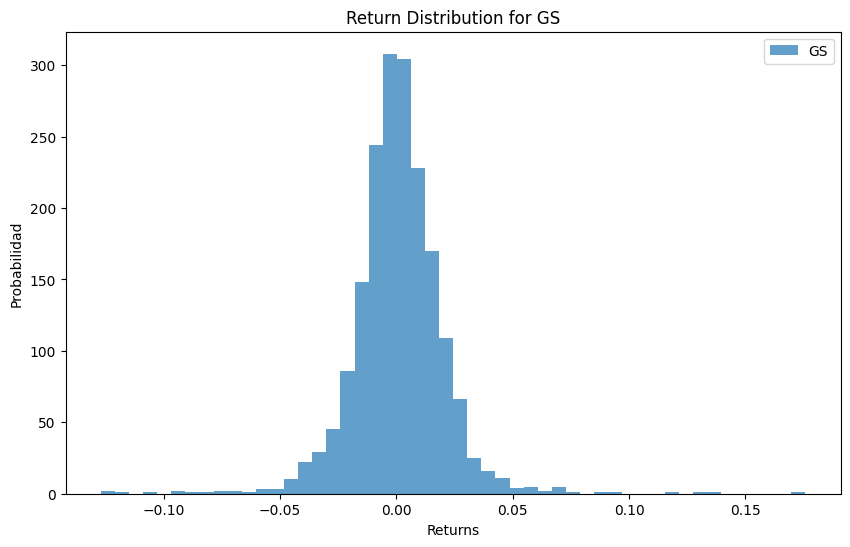

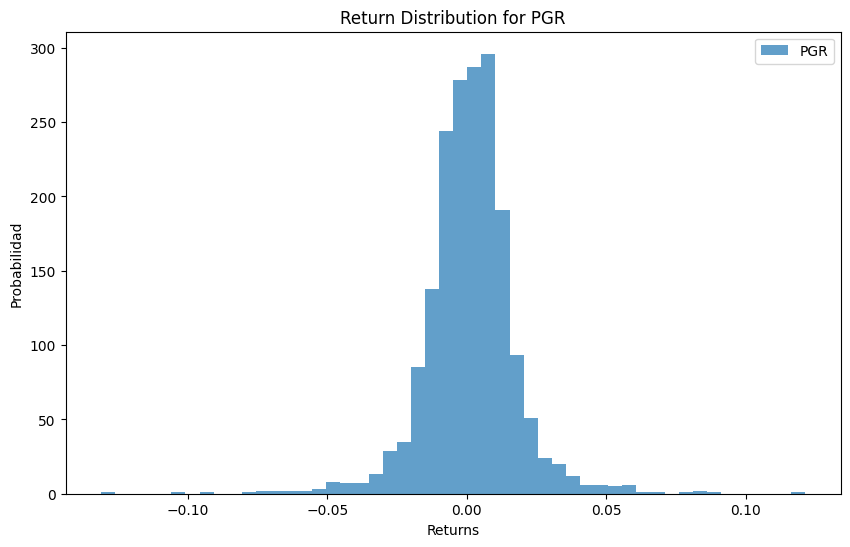

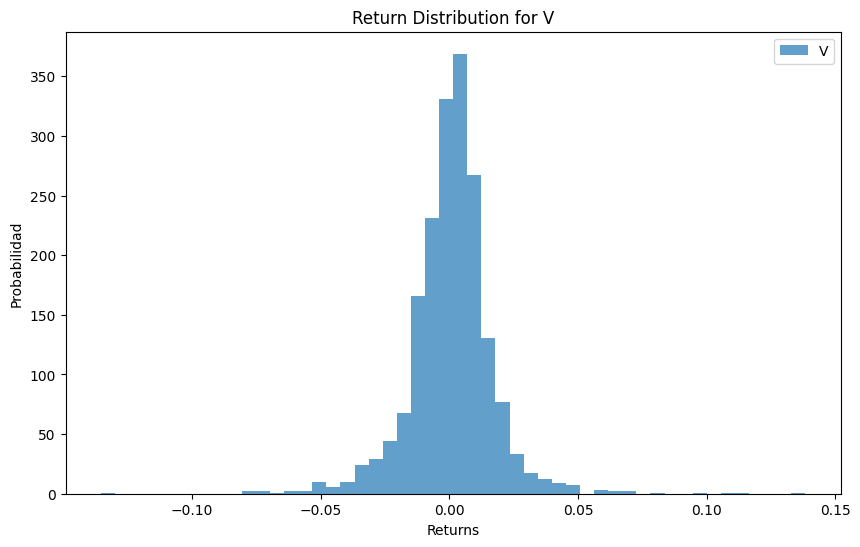

In [643]:
for stock in ret.keys():
    plt.figure(figsize=(10, 6))
    plt.hist(ret[stock], bins=50, alpha=0.7, label=stock)
    plt.title(f'Return Distribution for {stock}')
    plt.xlabel('Returns')   
    plt.ylabel('Probabilidad')
    plt.legend()
    plt.show()

In [644]:
df= pd.DataFrame(columns=ret.keys()).T

### Rendimientos anuales

In [645]:
mean= ret.mean()
ret_diario= (mean* w).sum()
print('rendimiento anual', ret_diario*100,'%')

rendimiento anual 0.08131743107079041 %


In [646]:
cov = ret.cov()

### Varianza

In [647]:
var_port_diario=w.T @ cov @ w
print('Varianza diaria del portafolio', var_port_diario*100, '%')

Varianza diaria del portafolio 0.018169055485588306 %


In [648]:
var_port_anual= var_port_diario*252*100
print('Varianza anual del portafolio ', var_port_anual, '%')

Varianza anual del portafolio  4.578601982368253 %


### Riesgo / Volatilidad 

In [649]:
vol_port_diario = np.sqrt(var_port_diario)
print('Volatilidad del portafolio diaria es de:', vol_port_diario*100, '%')

Volatilidad del portafolio diaria es de: 1.3479263884051054 %


In [650]:
vol_port_anual= vol_port_diario * np.sqrt(252)
print('Volatilidad del portafolio anual es de:', vol_port_anual*100, '%')

Volatilidad del portafolio anual es de: 21.397668056048197 %


### Coeficiente de Variación

In [651]:
CV = vol_port_anual / ret_diario
CV

263.1375312068157

### Ratio Sharpe

In [652]:
rf = 0.03

In [653]:
Sharpe_ratio = (ret_diario*252 - rf) / vol_port_anual

print ('Sharpe Ratio de : ',Sharpe_ratio )

Sharpe Ratio de :  0.8174719125477299


 Se tiene un buen rendimiento anual de los activos , pero cabe mencionar que hay un gran riesgo en este portafolio , por lo que no pudiera ser tan atractivo para nosotros como empresa (Banamex), también se tiene un coeficiente de variación muy alto. El Ratio Sharpe de 0.8174, por lo que puede estar mucho más alto qu el del índice , por lo que es una unidad de rendimiento por una de riesgo , por lo que es algo alto y bueno.


### Matriz de Correlación

In [654]:
ret.corr()

Ticker,BRK-B,GS,PGR,V
Ticker,,,,
BRK-B,1.000000,0.713607,0.534054,0.664746
GS,0.713607,1.000000,0.381716,0.590600
PGR,0.534054,0.381716,1.000000,0.424647
V,0.664746,0.590600,0.424647,1.000000


In [655]:
corr = 0.713607+0.534054+0.664746+0.381716+0.590600+0.424647
corr

3.3093700000000004

No se puede concluir que es un portafolio con una gran diversificación , ya que se necesitan tener muchos más activos que los que se tienen en este momento. Lo que si tiene es una correlación muy grande, ya que todos pertenecen al mismo sector economico , como lo es el sector financiero, por lo que van a estar muy correlacionadas y a su vez muy alejadas del 0.

---

## 2. Comparación de una estrategia de Inversión activa contra una pasiva

### Investigación sobre el Indice del sector económico financiero

- Este ess un subíndice del S&P 500 que agrupa a las empresas clasificadas dentro del sector financiero según el sistema GICS (Global Industry Classification Standard). Este índice incluye compañías que operan en áreas como banca, seguros, gestión de activos, servicios financieros diversificados y bienes raíces financieros. Este pertenece al sector economico financiero, las cuales , los 4 activos que escogimos en el punto uno , pertenecen al mismo sector que este . En este problema se asume que tiene una tasa libre de riesgo de 3% anual, por lo que se harán todos los caluclos con eso.

---

### Tasa libre de Riesgo

In [656]:
rf= 0.03

### Importación de los datos

In [657]:
prices2 = yf.download('^SP500-40',start='2018-01-01', end= '2025-06-03')['Close'] 
prices2.head(5)

[*********************100%***********************]  1 of 1 completed


Ticker,^SP500-40
Date,
2018-01-02,463.660004
2018-01-03,466.140015
2018-01-04,470.510010
2018-01-05,471.920013
2018-01-08,471.329987


---

### Ret

In [658]:
ret2 = prices2.pct_change().dropna()
ret2.head(5)

Ticker,^SP500-40
Date,
2018-01-03,0.005349
2018-01-04,0.009375
2018-01-05,0.002997
2018-01-08,-0.001250
2018-01-09,0.007129


### Rendimiento Anuales

In [659]:
w = 1

In [660]:
mean= ret2.mean()
ret_diario= (mean* w).sum()
print('rendimiento anual', ret_diario*252*100,'%')

rendimiento anual 11.153920209000256 %


### Varianza

In [661]:
var_port_diario = ret2.var()
print('varianza diaria del portafolio', var_port_diario*100, '%')

varianza diaria del portafolio Ticker
^SP500-40    0.023697
dtype: float64 %


In [662]:
var_port_anual= var_port_diario*252*100
print('varianza anual del portafolio ', var_port_anual, '%')

varianza anual del portafolio  Ticker
^SP500-40    5.971644
dtype: float64 %


### Riesgo / Volatilidad 

In [663]:
vol_port_diario = np.sqrt(var_port_diario)
print('Volatilidad del portafolio diaria es de:', vol_port_diario*100, '%')

Volatilidad del portafolio diaria es de: Ticker
^SP500-40    1.539383
dtype: float64 %


In [664]:
vol_port_anual= vol_port_diario * np.sqrt(252)
print('Volatilidad del portafolio anual es de:', vol_port_anual*100, '%')

Volatilidad del portafolio anual es de: Ticker
^SP500-40    24.436948
dtype: float64 %


### Coeficiente de Variación

In [665]:
CV = vol_port_anual / ret_diario
CV

Ticker
^SP500-40    552.102828
dtype: float64

### Ratio Sharpe

In [666]:
Sharpe_ratio = (ret_diario*252 - rf) / vol_port_anual

print ('Sharpe Ratio de : ',Sharpe_ratio )


Sharpe Ratio de :  Ticker
^SP500-40    0.333672
dtype: float64


### Conclusión 

En conclusión ,en esta estrategia se tiene que la primera estrategia tiene mayor rendimiento y a su vez mejor sharp que en el segundo portafolio. Po rlo que el primero es mejor si lo que queremos es tener mejores rendimientos, los dos tienen un riesgo bastante alto , por lo que quiero pensar que el primero es mejor porque ofrece mejor rendimiento , además de que tiene un ecoeficiente de variación mucho más bajo que el segundo portafolio. yo invirtiría en la primera estrategia , porque me gusta un poco más el riesgo y a su vez .